## Data exploration
A notebook for looking at the data and playing around with it.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [36]:
os.getcwd()

'/Users/emilejohnston/DataspellProjects/sna_link_prediction'

In [3]:
# Postings (comments under articles of Der Standard)
posting_1 = pd.read_csv('../../data/Postings_01052019_15052019.csv', sep=';')
posting_2 = pd.read_csv('../../data/Postings_16052019_31052019.csv', sep=';')
postings = pd.concat([posting_1, posting_2])
postings.head()

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,ArticleRessortName,UserCommunityName,UserGender,UserCreatedAt
0,1041073586,1.041073e+09,671476,Das hat gestern bereits der Voggenhuber angefü...,schieder hatte dem inhaltlich nichts entgegenz...,2019-05-01 18:21:15.127,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
1,1041073839,1.041073e+09,566938,NaN,...und meinen Bezirk bekommst du als Erbe mit.,2019-05-01 18:28:22.040,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,AlphaRomeo,m,2015-08-28 17:07:41.110
2,1041073872,1.041069e+09,669286,NaN,"Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...",2019-05-01 18:29:05.533,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Hpolditsch,NaN,2018-03-06 20:03:42.737
3,1041080734,1.041080e+09,671476,Sie haben doch nichts gefordert??,sie haben nur die regierung kritisiert. das di...,2019-05-01 22:37:56.010,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
4,1041080828,NaN,671476,Heute wäre der perfekte Tag für die SPÖ gewese...,"ihr noch nicht erfülltes versprechen, den silb...",2019-05-01 22:42:06.310,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470


In [13]:
print(f'Number of rows in the total dataframe: {len(postings)}')
print(f'Number of unique comment ids: {len(postings["ID_Posting"].unique())}')
print(f'Proportion of comments which are replies to other comments: {len(postings[postings["ID_Posting_Parent"].notnull()]) *100/ len(postings):.3} %')
n_users = len(postings["ID_CommunityIdentity"].unique())
print(f'Number of unique users: {n_users}')
print(f'Proportion of comments with a headline: {len(postings[postings["PostingHeadline"].notnull()])  *100/ len(postings):.3} %')
print(f'Proportion of comments with content: {len(postings[postings["PostingComment"].notnull()]) *100/ len(postings):.3} %')
print(f'Number of unique articles: {len(postings["ID_Article"].unique())}')
print(f'Number of unique article channels: {len(postings["ArticleChannel"].unique())}')
print(f'Number of unique article ressorts: {len(postings["ArticleRessortName"].unique())}')

Number of rows in the total dataframe: 739094
Number of unique comment ids: 739094
Proportion of comments which are replies to other comments: 67.7 %
Number of unique users: 23925
Proportion of comments with a headline: 28.0 %
Proportion of comments with content: 91.6 %
Number of unique articles: 4351
Number of unique article channels: 22
Number of unique article ressorts: 689


In [4]:
# most active users:
postings['ID_CommunityIdentity'].value_counts().head(10)

518647    1677
37541     1410
516173    1371
59327     1235
499749    1226
169493    1215
575173    1201
601254    1138
675721    1127
688289    1101
Name: ID_CommunityIdentity, dtype: int64

The user with the most comments, with ID 518647, posted 1677 comments over the period covered by the data (31 days). There are quite a few users who posted over 1000 comments, which is more than 30 comments per day on average.

In [32]:
# user gender:
postings['UserGender'].value_counts()

UserGender
m    470935
w     78734
Name: count, dtype: int64

In [33]:
# user gender:
men_comments = len(postings[postings['UserGender'] == 'm'])
women_comments = len(postings[postings['UserGender'] == 'w'])
nan_comments = len(postings[postings['UserGender'].isnull()])
total_comments = len(postings)
number_men = len(postings[postings['UserGender'] == 'm']['ID_CommunityIdentity'].unique())
number_women = len(postings[postings['UserGender'] == 'w']['ID_CommunityIdentity'].unique())
number_nan = len(postings[postings['UserGender'].isnull()]['ID_CommunityIdentity'].unique())
number_total = number_men + number_women + number_nan
print(f"Number of comments by users registered as men: {men_comments} ({men_comments*100/total_comments:.3} %)")
print(f"Number of comments by users registered as women: {women_comments} ({women_comments*100/total_comments:.3} %)")
print(f"Number of comments by users without registered gender: {nan_comments} ({nan_comments*100/total_comments:.3} %) ")
print(f"Number of users registered as men: {number_men} ({number_men*100/number_total:.3} %)")
print(f"Number of users registered as women: {number_women} ({number_women*100/number_total:.3} %)")
print(f"Number of users without registered gender: {number_nan} ({number_nan*100/number_total:.3} %)")

Number of comments by users registered as men: 470935 (63.7 %)
Number of comments by users registered as women: 78734 (10.7 %)
Number of comments by users without registered gender: 189425 (25.6 %) 
Number of users registered as men: 15370 (64.2 %)
Number of users registered as women: 2489 (10.4 %)
Number of users without registered gender: 6066 (25.4 %)


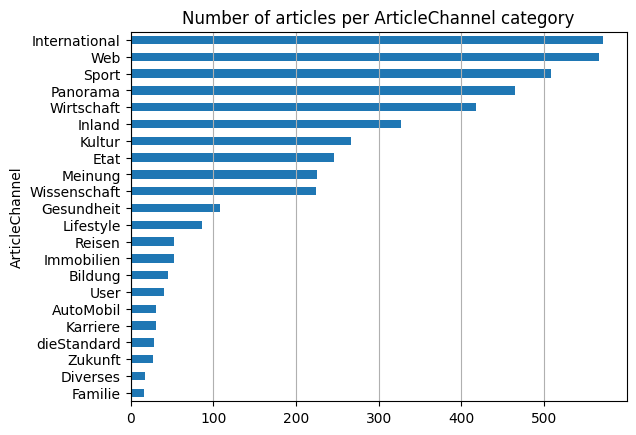

In [51]:
# Number of articles by ArticleChannel category:
Acn = postings.groupby('ArticleChannel')['ID_Article'].nunique().sort_values()
Acn.plot(kind='barh')
plt.title('Number of articles per ArticleChannel category')
plt.grid(axis='x')
plt.show()

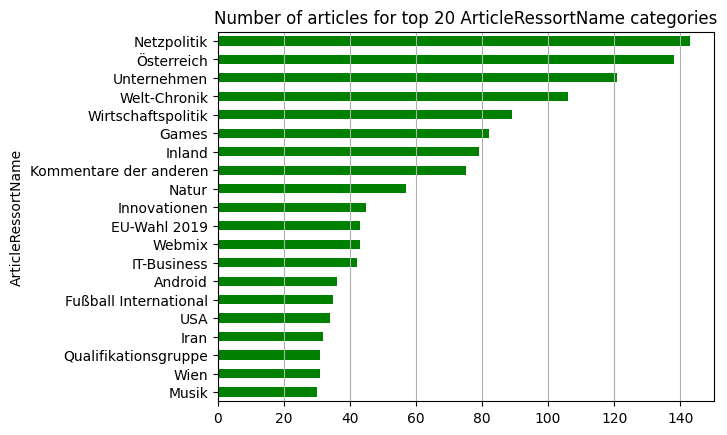

In [52]:
# Number of articles by ArticleRessortName category:
Arn = postings.groupby('ArticleRessortName')['ID_Article'].nunique()
Arn.nlargest(20).iloc[::-1].plot(kind='barh', color='green')
plt.title('Number of articles for top 20 ArticleRessortName categories')
plt.grid(axis='x')
plt.show()

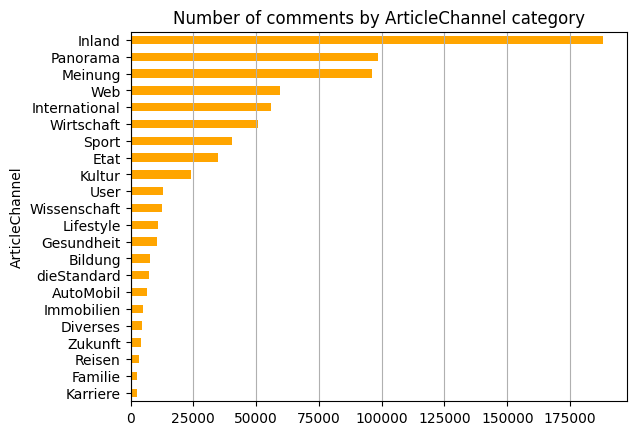

In [53]:
# Number of comments by ArticleChannel category:
Acc = postings['ArticleChannel'].value_counts()[::-1]
Acc.plot(kind='barh', color='orange')
plt.title('Number of comments by ArticleChannel category')
plt.grid(axis='x')
plt.show()

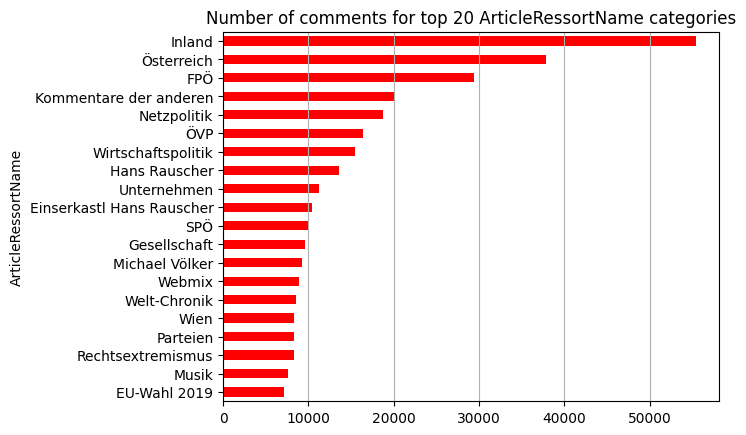

In [54]:
# Number of comments by ArticleRessortName category:
Arc = postings['ArticleRessortName'].value_counts()
Arc.nlargest(20).iloc[::-1].plot(kind='barh', color='red')
plt.title('Number of comments for top 20 ArticleRessortName categories')
plt.grid(axis='x')
plt.show()

In [55]:
postings["ArticleChannel"].unique()

array(['Inland', 'Meinung', 'International', 'Sport', 'Panorama',
       'Wirtschaft', 'Gesundheit', 'Web', 'Kultur', 'Bildung',
       'Wissenschaft', 'Immobilien', 'User', 'dieStandard', 'Etat',
       'Zukunft', 'Karriere', 'Lifestyle', 'Diverses', 'Reisen',
       'AutoMobil', 'Familie'], dtype=object)

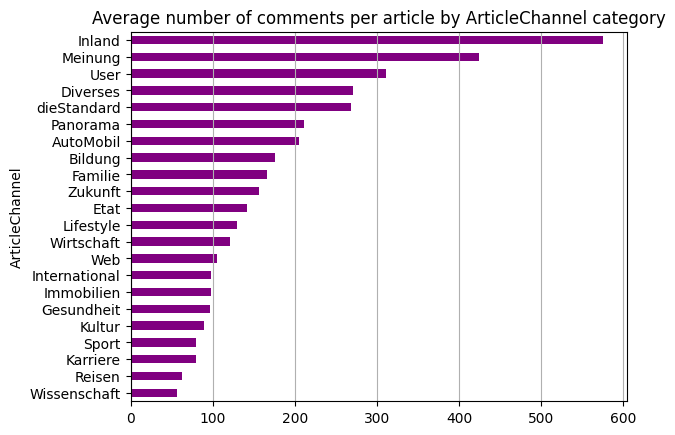

In [63]:
# Number of comments by ArticleChannel category:
Cpac = Acc / Acn
Cpac.name = 'Comments per article'
Cpac.sort_values().plot(kind='barh', color='purple')
plt.title('Average number of comments per article by ArticleChannel category')
plt.grid(axis='x')
plt.show()

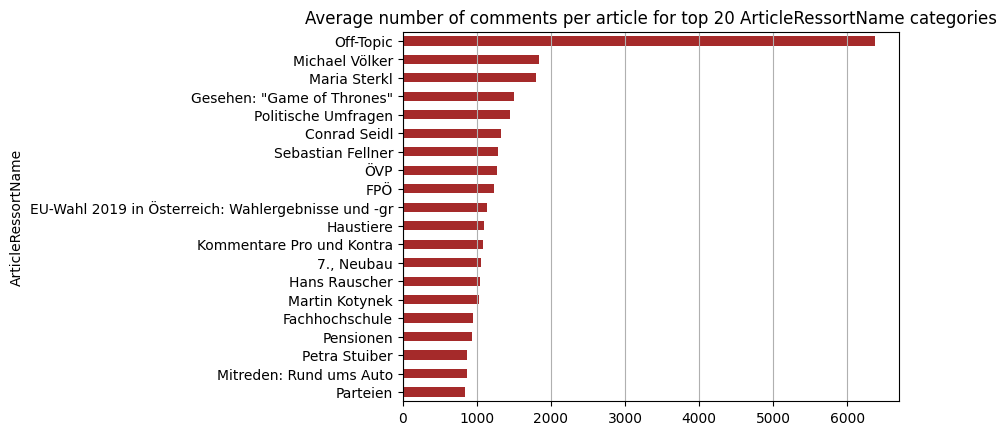

In [66]:
# Number of comments by ArticleRessortName category:
Cpar = Arc / Arn
Cpar.name = 'Comments per article'
Cpar.nlargest(20).iloc[::-1].plot(kind='barh', color='brown')
plt.title('Average number of comments per article for top 20 ArticleRessortName categories')
plt.grid(axis='x')
plt.show()

In [5]:
users = postings[['ID_CommunityIdentity','UserCommunityName','UserGender','UserCreatedAt']].drop_duplicates()
users

,ID_CommunityIdentity,UserCommunityName,UserGender,UserCreatedAt
0,671476,Ravenspower,NaN,2018-04-14 13:42:28.470
1,566938,AlphaRomeo,m,2015-08-28 17:07:41.110
2,669286,Hpolditsch,NaN,2018-03-06 20:03:42.737
6,523527,icecold_lips,m,2013-09-04 12:37:09.603
7,74674,GuteNachtSchaukel,NaN,2007-04-02 20:34:49.397
...,...,...,...,...
395202,694412,DerBöseFlick,NaN,2019-06-02 17:41:57.763
395279,89026,Hector Barbossa,m,2009-11-01 14:38:42.720
395641,666304,Tunnel D´or,NaN,2018-01-17 11:29:21.790
395656,155470,Mrs. Dalloway,w,2011-11-23 16:36:03.510


In [31]:
# make a csv file 
users.to_csv('../../data/saved/Users_postings.csv', index=False)

### Data anomalies

In [8]:
# checking for inconsistencies in the data:
#users['ID_CommunityIdentity'].value_counts()
#users['UserCommunityName'].value_counts()
users['UserCreatedAt'].value_counts()

UserCreatedAt
2012-12-05 01:47:43.317    66
2000-08-29 14:07:39.000     2
2000-09-05 14:17:52.000     2
2000-09-05 14:20:43.000     2
2000-08-29 13:51:12.000     2
                           ..
2019-01-11 11:47:27.143     1
2019-05-02 19:47:11.580     1
2006-05-09 14:31:27.167     1
2015-04-11 13:03:28.947     1
2017-12-07 16:13:24.730     1
Name: count, Length: 23849, dtype: int64

In [10]:
sus_postings = postings[postings['UserCreatedAt'] == '2012-12-05 01:47:43.317']
sus_postings

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,ArticleRessortName,UserCommunityName,UserGender,UserCreatedAt
123,1041059864,NaN,686949,Programmdiskussionen verkümmerten zu Workshops...,Auch das eine Folge der schweren Faymann-Jahre...,2019-05-01 09:49:31.037,2000102257779,2019-05-01 08:00:00.00,Vom Umgang der SPÖ mit der FPÖ: In Parteistatu...,Meinung,Kommentare der anderen,8b3b3b54-7e11-4708-8ec6-f0a46275cf28,m,2012-12-05 01:47:43.317
126,1041059507,NaN,686949,"wieso man die linke, soziale Politik im Burgen...",weil man nichts davon mitkriegt. Als Nicht-B...,2019-05-01 09:35:24.623,2000102263929,2019-05-01 08:00:00.00,"Roter Weltrevolutionär trifft Pragmatiker: ""In...",Inland,SPÖ,8b3b3b54-7e11-4708-8ec6-f0a46275cf28,m,2012-12-05 01:47:43.317
127,1041059615,NaN,686949,"Es ist eine Mär, dass wir intern streiten und ...","Um intern streiten zu können, bräuchte es 1) ...",2019-05-01 09:40:09.800,2000102263929,2019-05-01 08:00:00.00,"Roter Weltrevolutionär trifft Pragmatiker: ""In...",Inland,SPÖ,8b3b3b54-7e11-4708-8ec6-f0a46275cf28,m,2012-12-05 01:47:43.317
183,1041060005,NaN,686949,Strategie und Taktik,"Alle, die einen flexibleren Umgang mit der FPÖ...",2019-05-01 09:55:04.797,2000102257779,2019-05-01 08:00:00.00,Vom Umgang der SPÖ mit der FPÖ: In Parteistatu...,Meinung,Kommentare der anderen,8b3b3b54-7e11-4708-8ec6-f0a46275cf28,m,2012-12-05 01:47:43.317
383,1041060412,1.041060e+09,686949,NaN,Die FPÖ ist sicher nicht gegen rechtsreaktionä...,2019-05-01 10:12:01.180,2000102257779,2019-05-01 08:00:00.00,Vom Umgang der SPÖ mit der FPÖ: In Parteistatu...,Meinung,Kommentare der anderen,8b3b3b54-7e11-4708-8ec6-f0a46275cf28,m,2012-12-05 01:47:43.317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366264,1042263688,1.042262e+09,692184,NaN,Beide Teams haben eine Heimschwäche... Die Log...,2019-05-31 15:01:50.343,2000104131527,2019-05-31 11:59:43.00,"Kühbauer glaubt an die Wende, Mählich warnt",Sport,Qualifikationsgruppe,efbe9307-cb67-4f39-b115-d6ac6da223f2,m,2012-12-05 01:47:43.317
367798,1042234787,NaN,693962,NaN,würde man sich mehr den themen wie seiner völl...,2019-05-30 16:22:38.917,2000103995955,2019-05-29 16:42:21.00,"Was, wenn Kurz es so wollte? Ein Gedankenspiel",Meinung,Sebastian Fellner,028c49ce-8444-41cd-adfa-18ccbe1e5802,m,2012-12-05 01:47:43.317
371969,1042257102,NaN,693962,NaN,diese regierung ist wohl eine einmalige gelege...,2019-05-31 11:21:09.803,2000104101028,2019-05-30 18:42:14.00,Brigitte Bierlein wird erste Bundeskanzlerin Ö...,Inland,Bundespräsident,028c49ce-8444-41cd-adfa-18ccbe1e5802,m,2012-12-05 01:47:43.317
386754,1042282222,1.042281e+09,692184,NaN,Hast einen besseren IV an der Angel ?,2019-06-01 10:11:51.933,2000104131527,2019-05-31 11:59:43.00,"Kühbauer glaubt an die Wende, Mählich warnt",Sport,Qualifikationsgruppe,efbe9307-cb67-4f39-b115-d6ac6da223f2,m,2012-12-05 01:47:43.317


In [29]:
comments_per_user = len(postings)/n_users
print(f"Each user makes {comments_per_user} comments on average.")
comments_per_sus_user = len(sus_postings)/66
print(f"Each suspicious user makes {comments_per_sus_user} comments on average.")
print(f"{len(sus_postings[sus_postings['ID_Posting_Parent'].notna()])*100/len(sus_postings):.3}% of comments from suspicious users are replies.")
print(f"{len(sus_postings[sus_postings['PostingHeadline'].notna()])*100/len(sus_postings):.3}% of comments from suspicious users have headings.")
print(f"{len(sus_postings[sus_postings['PostingComment'].notna()])*100/len(sus_postings):.3}% of comments from suspicious users have content.")

Each user makes 30.89212121212121 comments on average.
Each suspicious user makes 56.833333333333336 comments on average.
81.3% of comments from suspicious users are replies.
7.46% of comments from suspicious users have headings.
89.3% of comments from suspicious users have content.


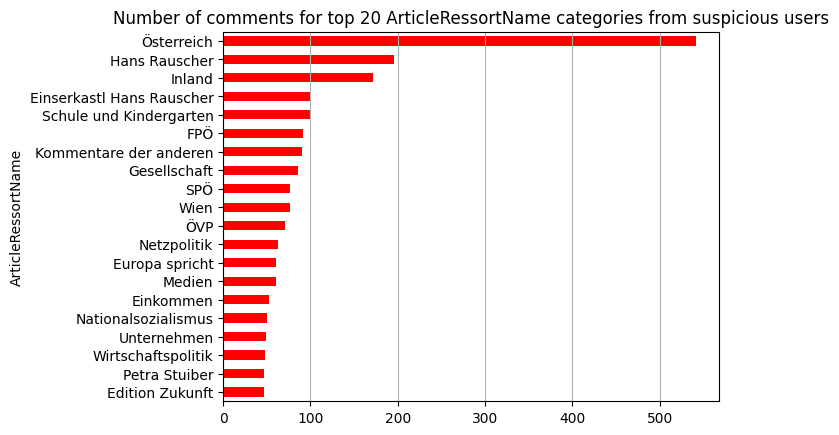

In [26]:
# Number of comments from suspicious users by ArticleRessortName category:
Arc_sus = sus_postings['ArticleRessortName'].value_counts()
Arc_sus.nlargest(20).iloc[::-1].plot(kind='barh', color='red')
plt.title('Number of comments for top 20 ArticleRessortName categories from suspicious users')
plt.grid(axis='x')
plt.show()

### Putting articles into a separate file to save space

In [33]:
Articles = postings[['ID_Article','ArticleTitle','ArticlePublishingDate','ArticleChannel','ArticleRessortName']].drop_duplicates()
Articles

,ID_Article,ArticleTitle,ArticlePublishingDate,ArticleChannel,ArticleRessortName
0,2000102330973,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,2019-05-01 10:28:57.49,Inland,Parteien
13,2000102386715,"Welcher ""Austausch"" der Bevölkerung in Österre...",2019-05-03 11:45:14.00,Inland,Sachpolitik
19,2000102257779,Vom Umgang der SPÖ mit der FPÖ: In Parteistatu...,2019-05-01 08:00:00.00,Meinung,Kommentare der anderen
20,2000102370556,Haftbefehl gegen Oppositionsführer López in Ve...,2019-05-02 09:30:02.84,International,Venezuela
29,2000102263929,"Roter Weltrevolutionär trifft Pragmatiker: ""In...",2019-05-01 08:00:00.00,Inland,SPÖ
...,...,...,...,...,...
392365,2000103561724,"Machen digitale Elektronik, Smartwatch und Wha...",2019-05-26 15:12:58.00,Wissenschaft,Forschung Spezial
392642,2000104151386,Wirecard-Aktie nach Zeitungsbericht unter Druck,2019-05-31 16:18:30.00,Web,IT-Business
392962,2000104090907,Partyplan fürs Wochenende: Queer feiern am End...,2019-05-31 06:00:00.00,Kultur,Was ist los in Wien?
393867,2000104143028,Türkei ermittelt gegen deutsche Journalistin –...,2019-05-31 14:18:37.00,Etat,Presse- und Meinungsfreiheit


In [37]:
Articles.to_csv('../../data/saved/Articles_postings.csv', index=False)

### Putting postings into a new reduced file

In [38]:
Postings_reduced = postings.iloc[:,:7]
Postings_reduced

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article
0,1041073586,1.041073e+09,671476,Das hat gestern bereits der Voggenhuber angefü...,schieder hatte dem inhaltlich nichts entgegenz...,2019-05-01 18:21:15.127,2000102330973
1,1041073839,1.041073e+09,566938,NaN,...und meinen Bezirk bekommst du als Erbe mit.,2019-05-01 18:28:22.040,2000102330973
2,1041073872,1.041069e+09,669286,NaN,"Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...",2019-05-01 18:29:05.533,2000102330973
3,1041080734,1.041080e+09,671476,Sie haben doch nichts gefordert??,sie haben nur die regierung kritisiert. das di...,2019-05-01 22:37:56.010,2000102330973
4,1041080828,NaN,671476,Heute wäre der perfekte Tag für die SPÖ gewese...,"ihr noch nicht erfülltes versprechen, den silb...",2019-05-01 22:42:06.310,2000102330973
...,...,...,...,...,...,...,...
395929,1042380731,1.042380e+09,553628,NaN,Vermutlich gar keines...mir ist jedenfalls kei...,2019-06-04 08:54:54.177,2000103620997
395930,1042381030,NaN,553628,NaN,*winkt dankbar zur Gödelnummer* Du bist echt d...,2019-06-04 09:04:32.037,2000103620997
395931,1042381528,1.042381e+09,553628,NaN,"Die sind noch in Arbeit, aber der Surface läuf...",2019-06-04 09:22:54.473,2000103620997
395932,1042381793,1.042380e+09,553628,NaN,"Ich versteh das überhaupt nicht, warum so viel...",2019-06-04 09:31:45.077,2000103620997


In [39]:
Postings_reduced.to_csv('../../data/saved/Postings.csv',index=False) # makes a file of 30,3 Mb

In [41]:
Postings_small = postings[['ID_Posting','ID_Posting_Parent','ID_CommunityIdentity','ID_Article']]
Postings_small

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,ID_Article
0,1041073586,1.041073e+09,671476,2000102330973
1,1041073839,1.041073e+09,566938,2000102330973
2,1041073872,1.041069e+09,669286,2000102330973
3,1041080734,1.041080e+09,671476,2000102330973
4,1041080828,NaN,671476,2000102330973
...,...,...,...,...
395929,1042380731,1.042380e+09,553628,2000103620997
395930,1042381030,NaN,553628,2000103620997
395931,1042381528,1.042381e+09,553628,2000103620997
395932,1042381793,1.042380e+09,553628,2000103620997


In [42]:
Postings_small.to_csv('../../data/saved/Postings.csv', index=False)